<a href="https://colab.research.google.com/github/jcomita/ML-Assignment-1/blob/main/Comita_MOMA_DataVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [9]:
#load MOMA artists database
df_moma_artists = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/main/Artists.csv')

In [10]:
#inspecting data
df_moma_artists.head(156633)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15590,138318,Angelo González,NaN,NaN,male,0,0,NaN,NaN
15591,138319,Roy Battiste,NaN,NaN,male,0,0,NaN,NaN
15592,138320,(Moses) Anthony Figueroa,NaN,NaN,NaN,0,0,NaN,NaN
15593,138321,Sal Becker,NaN,NaN,male,0,0,NaN,NaN


In [11]:
#summarize data
df_moma_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15595 entries, 0 to 15594
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15595 non-null  int64  
 1   DisplayName    15595 non-null  object 
 2   ArtistBio      13401 non-null  object 
 3   Nationality    13107 non-null  object 
 4   Gender         12352 non-null  object 
 5   BeginDate      15595 non-null  int64  
 6   EndDate        15595 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [14]:
#check data for any potential numerical errors
missing_values = df_moma_artists.isnull().sum()
print("missing values per column:\n", missing_values)

missing values per column:
 ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12348
ULAN             12664
dtype: int64


In [17]:
#check data for any potential duplicates
duplicates = df_moma_artists[df_moma_artists.duplicated]
print("Duplicates:\n", duplicates)

Duplicates:
 Empty DataFrame
Columns: [ConstituentID, DisplayName, ArtistBio, Nationality, Gender, BeginDate, EndDate, Wiki QID, ULAN]
Index: []


In [22]:
#Examine column Artist Bio
df_moma_artists['ArtistBio']

,ArtistBio
0,"American, 1930–1992"
1,"Spanish, born 1936"
2,"American, born 1941"
3,"American, born 1946"
4,"Danish, born 1941"
...,...
15590,NaN
15591,NaN
15592,NaN
15593,NaN


In [30]:
#Examine column Nationality
df_moma_artists['Nationality']

,Nationality
0,American
1,Spanish
2,American
3,American
4,Danish
...,...
15590,NaN
15591,NaN
15592,NaN
15593,NaN


In [33]:
#Figure out how many different nationalities exist
column_data = df_moma_artists['Nationality']
num_unique_strings = column_data.nunique()
print(f'The number of unique strings in the column is: {num_unique_strings}')

The number of unique strings in the column is: 128


In [36]:
#List the different nationalities by name
column_data = df_moma_artists['Nationality']
unique_strings = column_data.unique()
print(f'The unique strings in the column are: {unique_strings}')

The unique strings in the column are: ['American' 'Spanish' 'Danish' 'Italian' 'French' 'Estonian' 'Mexican'
 'Swedish' nan 'Israeli' 'British' 'Finnish' 'Polish' 'Palestinian'
 'Japanese' 'Guatemalan' 'Colombian' 'Romanian' 'Russian' 'German'
 'Argentine' 'Kuwaiti' 'Belgian' 'Dutch' 'Norwegian' 'Nationality unknown'
 'Chilean' 'Swiss' 'Costa Rican' 'Czech' 'Brazilian' 'Austrian' 'Canadian'
 'Australian' 'Ukrainian' 'Hungarian' 'Haitian' 'Congolese' 'Bolivian'
 'Cuban' 'Slovenian' 'Portuguese' 'Indian' 'Peruvian' 'Icelandic' 'Irish'
 'Croatian' 'Uruguayan' 'Slovak' 'Greek' 'Serbian' 'Chinese' 'Venezuelan'
 'Native American' 'Turkish' 'Panamanian' 'Algerian' 'Ecuadorian'
 'South African' 'Iranian' 'Puerto Rican' 'Korean' 'Canadian Inuit'
 'Paraguayan' 'Luxembourger' 'Nicaraguan' 'Zimbabwean' 'Moroccan'
 'Tanzanian' 'Bulgarian' 'Tunisian' 'Sudanese' 'Taiwanese' 'Ethiopian'
 'Yugoslav' 'Scottish' 'Latvian' 'Azerbaijani' 'Senegalese' 'Thai'
 'New Zealander' 'Lithuanian' 'Pakistani' 'Bahami

In [44]:
#Create a variable called Nationality that includes the list of nationalities
nationality = [unique_strings]
print(nationality)

[array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Palestinian', 'Japanese', 'Guatemalan', 'Colombian',
       'Romanian', 'Russian', 'German', 'Argentine', 'Kuwaiti', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Slovenian', 'Portuguese', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'Croatian', 'Uruguayan',
       'Slovak', 'Greek', 'Serbian', 'Chinese', 'Venezuelan',
       'Native American', 'Turkish', 'Panamanian', 'Algerian',
       'Ecuadorian', 'South African', 'Iranian', 'Puerto Rican', 'Korean',
       'Canadian Inuit', 'Paraguayan', 'Luxembourger', 'Nicaraguan',
       'Zimbabwean', 'Moroccan', 'Tanzanian', 'Bulgarian', 'Tunisian',
       'Sudanese', 'Taiwanese',

In [40]:
#Import Numpy
import numpy as np

In [71]:
#Convert to an array
data_array = np.array(nationality)
nationality, counts = np.unique(data_array, return_counts=True)
for string, count in zip(nationality, counts):
  print(f'Frequency of "{string}": {count}')

TypeError: '<' not supported between instances of 'float' and 'str'

In [53]:
#Import Matplotlib
import matplotlib.pyplot as plt

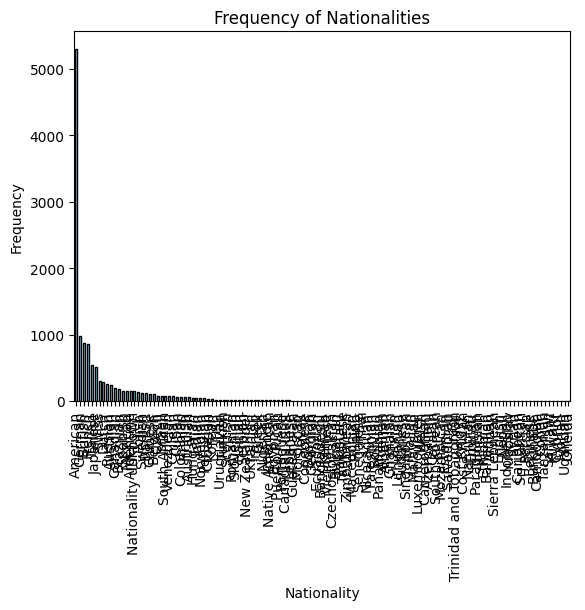

In [67]:
#Plot list as bar chart
value_counts = df_moma_artists['Nationality'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()